In [1]:
# Regression Problem: output is numerical in nature
# simple regression: where output is based on single feature, year vs gdp
# multiple linear regression: features are multiple
# House price prediction: house age, sq feet,
# int, float
# Rainfall prediction
# Sales Prediction
# revenue prediction
# GDP
# Stock price prediction
# Classifaction Problem
  # Binary class: Only Two class
    # Yes/No
    # True/False
    # 1/0
    # Insurance buy or not
    # Disease cancer classification: yes / no
    # Rainfall prediction: yes/no
    # Credit card :
    # Stock buy: yes/no
    # sentiment analysis: reviews analysis: +ve | -ve
    # SPAM: mail: yes or not
  # Multiclass classification
    # More than two classification
    # Image segementation
    # Facial classifcation
    # Flowers class
    # Moviews Recommendation
    # Digits Classification
    # Image classification

In [2]:
# Classification Problem:
# Binary Class: 0/1, True. False

# Project Objective: Build ML Model that predict customer buy Insurance or not

# Step 1: Import all important modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings('ignore')
print('All Modules Loaded Successfully!!')

All Modules Loaded Successfully!!


# LogisticRegression: It mainly use for classification problems: Binary

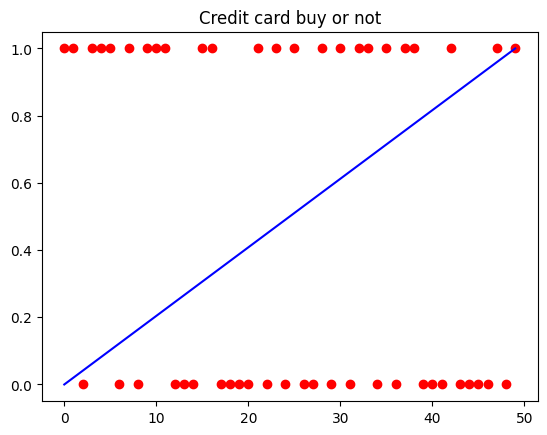

In [4]:
y = np.random.randint(0,2,50)
x = range(0,50)
line_data = np.linspace(0,1,50)

# zero: not interested, # 1: interested
plt.title('Credit card buy or not')
plt.scatter(x,y, color = 'r')
plt.plot(line_data, color ='b')
plt.show()

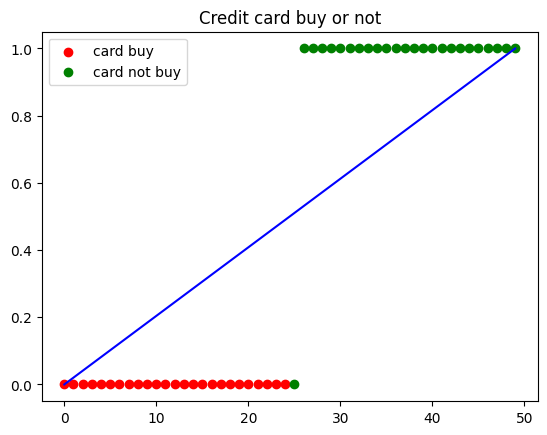

In [5]:
y = []
for i in range(50):
  if i <= 25:
    y.append(0)
  else:
    y.append(1)
x = range(0,50)
line_data = np.linspace(0,1,50)

# zero: not interested, # 1: interested
plt.title('Credit card buy or not')
plt.scatter(x[:25],y[:25], color = 'r', label = 'card buy')
plt.scatter(x[25:],y[25:], color = 'g', label = 'card not buy')
plt.plot(line_data, color ='b')
plt.legend()
plt.show()

In [6]:
def sigmoid_func(x):
  return (1/(1+ np.e**(-x)))
  # It returns s-curve
  # It never touches 1, 0

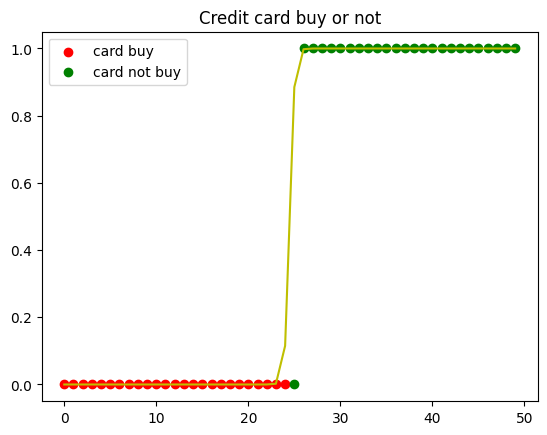

In [7]:
line_data = np.linspace(-100,100,50)
s_curve = sigmoid_func(line_data)

plt.title('Credit card buy or not')
plt.scatter(x[:25],y[:25], color = 'r', label = 'card buy')
plt.scatter(x[25:],y[25:], color = 'g', label = 'card not buy')
# plt.plot(line_data, color ='b')
plt.plot(s_curve, color ='y')

plt.legend()
plt.show()

In [8]:
min(s_curve)

np.float64(3.7200759760208555e-44)

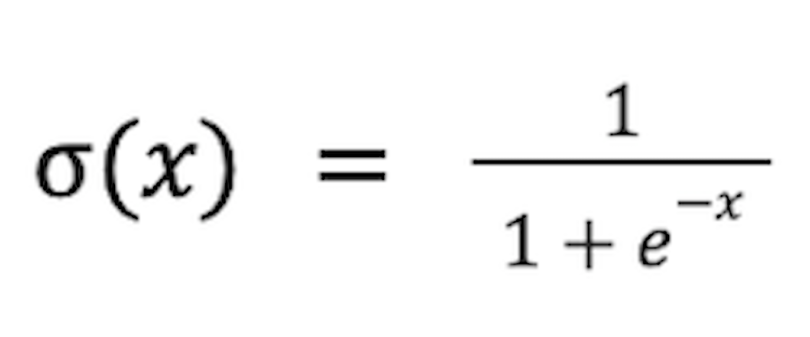

In [9]:
np.e

2.718281828459045

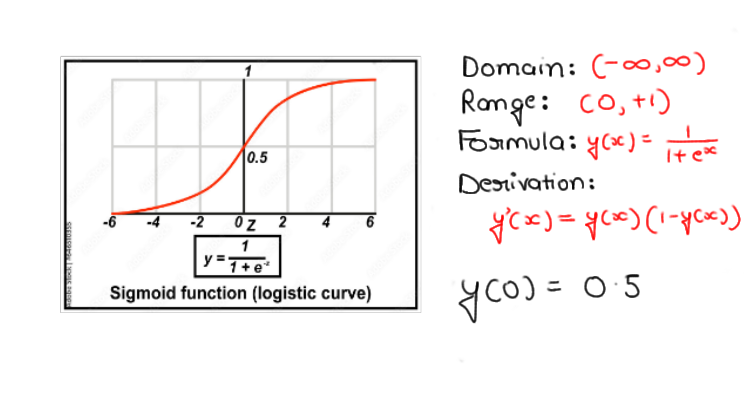

In [11]:
# Dataset link:https://drive.google.com/file/d/1fH-Lmfy4LGMR7EWO8HocRpz93U7rNChi/view?usp=sharing

# Step 2: Load DataSet

In [12]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vROfD2r_s22Yfo_x3V3nMXXFJYaeDR9wUSU4ha9t57gmNscSnv6R-GyaDDBbh0HaXYDo1cVpL9UHBT1/pub?output=csv'
print(url)

https://docs.google.com/spreadsheets/d/e/2PACX-1vROfD2r_s22Yfo_x3V3nMXXFJYaeDR9wUSU4ha9t57gmNscSnv6R-GyaDDBbh0HaXYDo1cVpL9UHBT1/pub?output=csv


In [13]:
df = pd.read_csv(url)
df.sample(2)

,age,gender,salary,credit_score,previous_claim,marital_status,insurance_bought
20,32,Male,43000,660,0,Married,1
28,40,Male,57000,725,0,Married,1


In [14]:
df.shape

(85, 7)

In [15]:
df.head(5)

,age,gender,salary,credit_score,previous_claim,marital_status,insurance_bought
0,22,Male,28000,580,0,Single,0
1,23,Female,30000,590,0,Single,0
2,24,Male,31000,600,0,Single,0
3,25,Female,32000,605,1,Single,0
4,26,Male,33000,610,0,Single,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               85 non-null     int64 
 1   gender            85 non-null     object
 2   salary            85 non-null     int64 
 3   credit_score      85 non-null     int64 
 4   previous_claim    85 non-null     int64 
 5   marital_status    85 non-null     object
 6   insurance_bought  85 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 4.8+ KB


In [17]:
df.columns

Index(['age', 'gender', 'salary', 'credit_score', 'previous_claim',
       'marital_status', 'insurance_bought'],
      dtype='object')

In [18]:
df.sample(5)

,age,gender,salary,credit_score,previous_claim,marital_status,insurance_bought
9,31,Female,40000,645,0,Single,0
73,41,Female,59500,735,0,Married,1
52,35,Male,47500,680,1,Married,1
71,39,Female,55500,720,0,Married,1
49,51,Female,80000,830,0,Married,1


In [19]:
df.isna().sum()

,0
age,0
gender,0
salary,0
credit_score,0
previous_claim,0
marital_status,0
insurance_bought,0


In [20]:
# ETL: Extract, Transform, Load
# ELT: Extract , Load, Transform
# ETLT: Extract, transform, Load, Transform

In [22]:
df.describe().round()

,age,salary,credit_score,previous_claim,insurance_bought
count,85.0,85.0,85.0,85.0,85.0
mean,36.0,51706.0,699.0,0.0,1.0
std,8.0,14148.0,66.0,0.0,0.0
min,22.0,28000.0,580.0,0.0,0.0
25%,31.0,40500.0,650.0,0.0,0.0
50%,36.0,50000.0,695.0,0.0,1.0
75%,42.0,61500.0,745.0,1.0,1.0
max,52.0,82000.0,840.0,1.0,1.0


In [23]:
df.describe(include='object')
# instances, Rows, records

,gender,marital_status
count,85,85
unique,2,2
top,Male,Married
freq,43,59


In [24]:
text_columns = df.select_dtypes('object').columns
text_columns

Index(['gender', 'marital_status'], dtype='object')

In [25]:
num_columns = df.select_dtypes('number').columns
num_columns

Index(['age', 'salary', 'credit_score', 'previous_claim', 'insurance_bought'], dtype='object')

In [28]:
# text_analysis

for i in text_columns:
  display(df[i].value_counts())

,count
gender,
Male,43
Female,42


,count
marital_status,
Married,59
Single,26


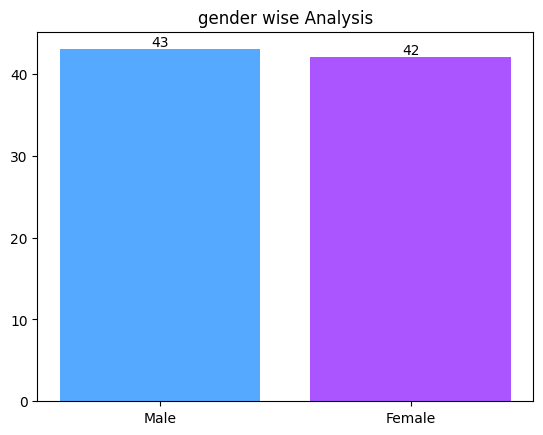

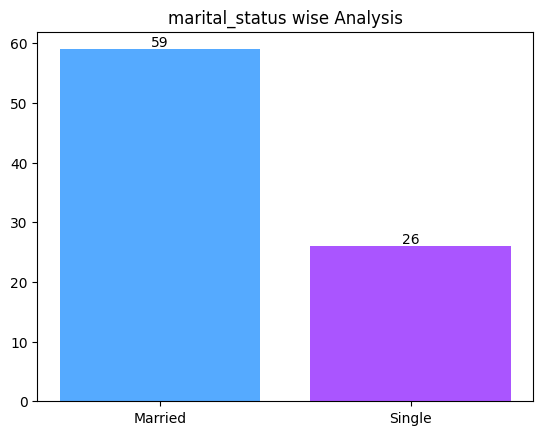

In [31]:
for i in text_columns:
  x = df[i].value_counts().index
  y = df[i].value_counts().values
  plt.title(f'{i} wise Analysis')
  ax = plt.bar(x,y, color = sns.color_palette('cool',2))
  plt.bar_label(ax)
  plt.show()

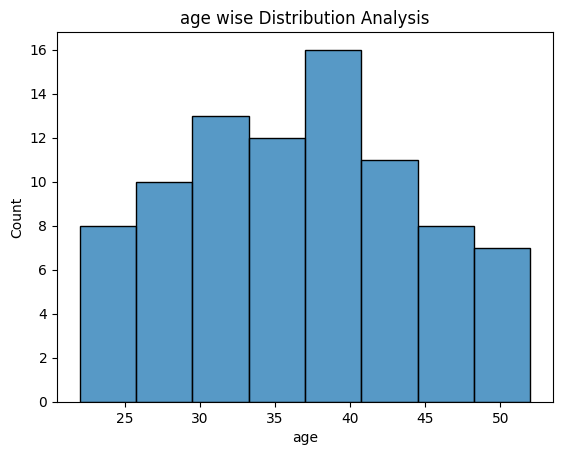

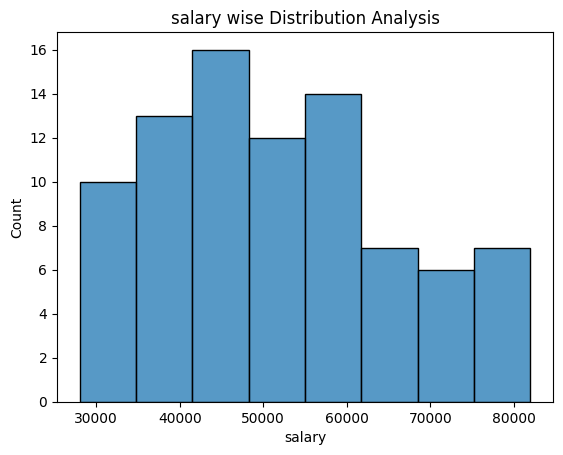

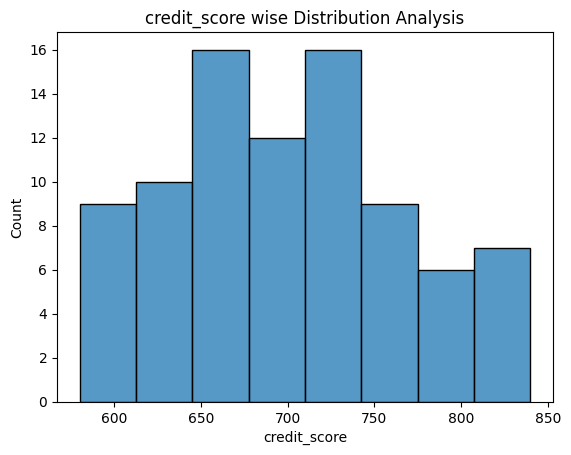

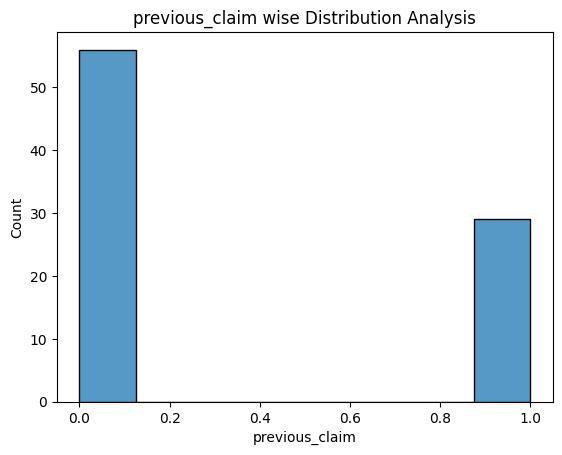

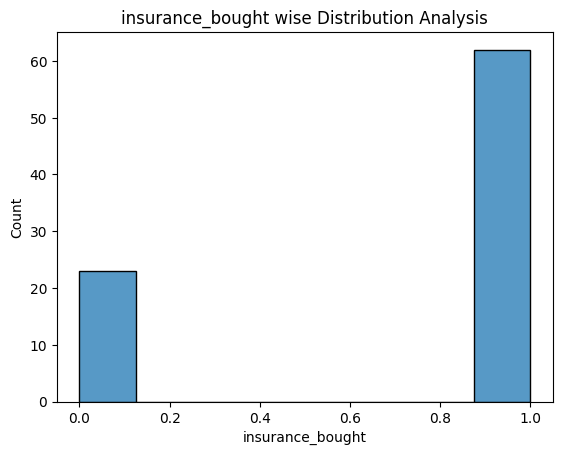

In [33]:
# Num distribution analysis

for i in num_columns:
  plt.title(f'{i} wise Distribution Analysis')
  sns.histplot(df[i])
  plt.show()

In [37]:
df.corr(numeric_only=True).round(2)

,age,salary,credit_score,previous_claim,insurance_bought
age,1.00,1.00,1.00,-0.07,0.76
salary,1.00,1.00,1.00,-0.08,0.72
credit_score,1.00,1.00,1.00,-0.08,0.73
previous_claim,-0.07,-0.08,-0.08,1.00,-0.06
insurance_bought,0.76,0.72,0.73,-0.06,1.00


In [38]:
# Feature Engineering: A technique to Convert textual data to numerical one

In [39]:
# OneHOTEncoding, pd.get_dummies
# Label Encoder
# Ordinal Encoding
# map: lambda, apply_map(dict)

In [42]:
df['gender'] = df['gender'].map({'Male':1,'Female':0})

In [47]:
df.sample()

,age,gender,salary,credit_score,previous_claim,marital_status,insurance_bought
44,46,1,70000,780,1,0,1


In [44]:
df['marital_status'].unique()

array(['Single', 'Married'], dtype=object)

In [46]:
df['marital_status'] = df['marital_status'].apply(lambda row: 1 if row == 'Single' else 0)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               85 non-null     int64
 1   gender            85 non-null     int64
 2   salary            85 non-null     int64
 3   credit_score      85 non-null     int64
 4   previous_claim    85 non-null     int64
 5   marital_status    85 non-null     int64
 6   insurance_bought  85 non-null     int64
dtypes: int64(7)
memory usage: 4.8 KB


In [50]:
df.corr().round(2).iloc[:,-1]

,insurance_bought
age,0.76
gender,0.03
salary,0.72
credit_score,0.73
previous_claim,-0.06
marital_status,-0.92
insurance_bought,1.00


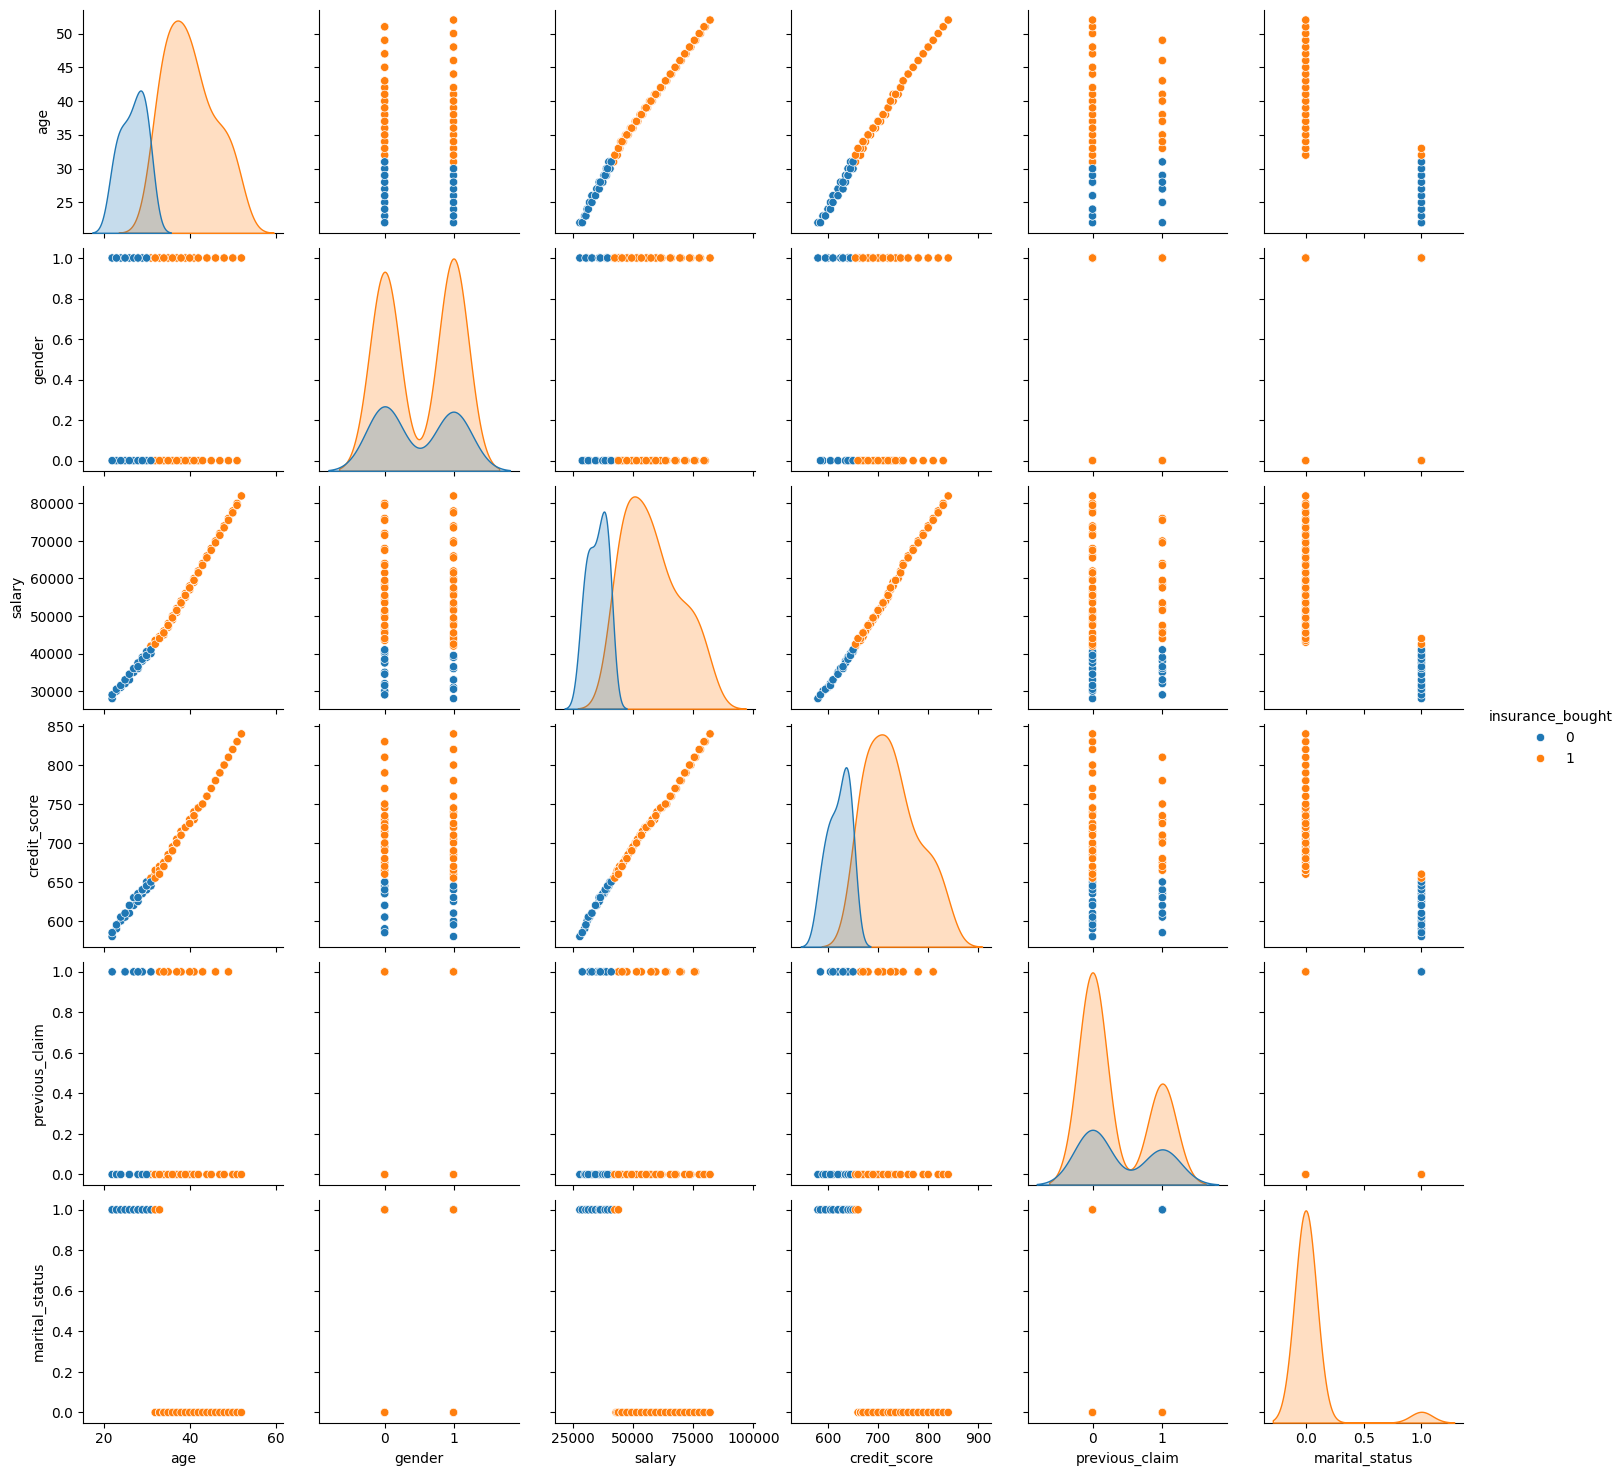

In [52]:
sns.pairplot(df, hue = 'insurance_bought')
plt.show()

# Step 4: Model Building

In [53]:
# Features vs target
X = df.iloc[:,:-1]
X

,age,gender,salary,credit_score,previous_claim,marital_status
0,22,1,28000,580,0,1
1,23,0,30000,590,0,1
2,24,1,31000,600,0,1
3,25,0,32000,605,1,1
4,26,1,33000,610,0,1
...,...,...,...,...,...,...
80,48,1,73500,800,0,0
81,49,0,75500,810,1,0
82,50,1,77500,820,0,0
83,51,0,79500,830,0,0


In [54]:
y = df.iloc[:,-1]
y

,insurance_bought
0,0
1,0
2,0
3,0
4,0
...,...
80,1
81,1
82,1
83,1


In [59]:
# 4.2 #training and testing part
# un-packing
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [58]:
a,b,c,d = [2,3,4,5]
# un-packing


In [60]:
# 4.3: model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [63]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
y_test.values

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [65]:
# Training accuracy
model.score(X_train,y_train)

1.0

In [66]:
# Testing Accuracy
model.score(X_test,y_test)

1.0

In [67]:
# When we can get -ve accuracy?

In [68]:
# Binary Classification
# in Linear Regression: MSE, MAE, RMSE, R2_Score, Adjusted_r2_score
# in Logistic Regression or any classifcation: Specificity_score,Accuracy-Score, Sensitivity_score/Recall_score, Precision_Score, f1_score, confusion_matrix,classification_matrix

In [69]:
# confusion_matrix

In [70]:
# Actual Answer         Model Answer
#   yes                     yes     : right output
#   yes                     no    :   wrong output
#   no                      yes  :   wrong output
#   no                      no   : right output

In [71]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, f1_score
print('Done')

Done


In [74]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 5,  0],
       [ 0, 12]])

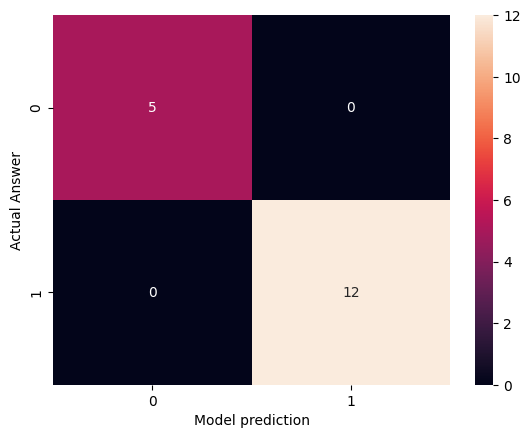

In [77]:
sns.heatmap(cm, annot = True)
plt.xlabel('Model prediction')
plt.ylabel('Actual Answer')
plt.show()